In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('dataset.csv')
tt_df=data.copy()
tt_df['subject'] = '#' + tt_df['subject'].astype(str)

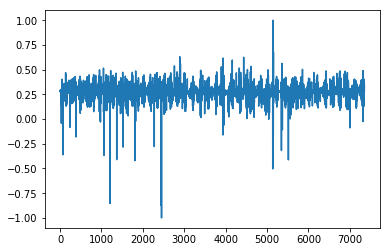

In [3]:
sensor=tt_df.iloc[:,0]
time=np.arange(0,len(sensor),1)
# import matplotlib.pyplot as plt

plt.plot(time, sensor)

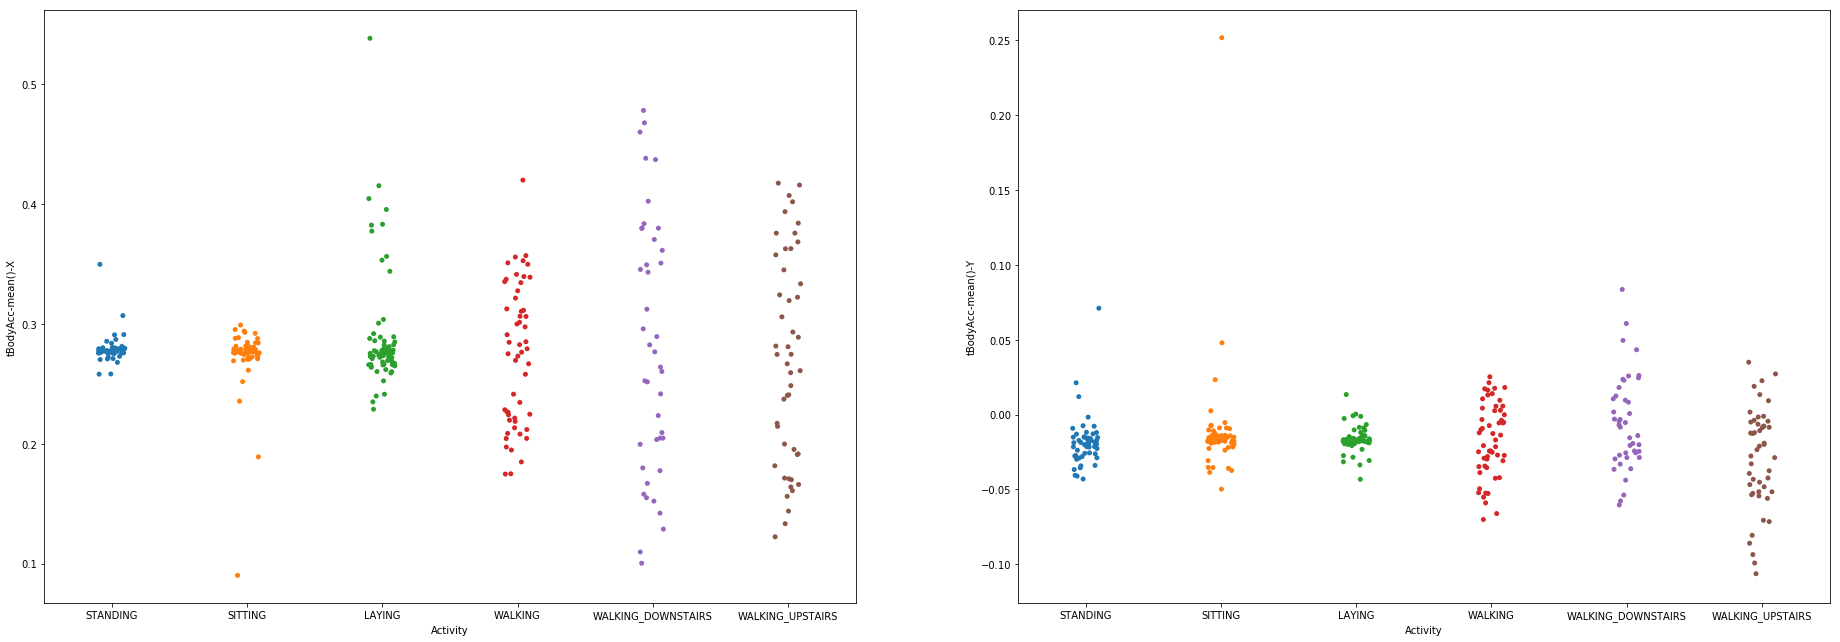

In [4]:
sub15 = data.loc[data['subject']==15]
fig = plt.figure(figsize=(32,24))
ax1 = fig.add_subplot(221)
ax1 = sns.stripplot(x='Activity', y=sub15.iloc[:,0], data=sub15, jitter=True)
ax2 = fig.add_subplot(222)
ax2 = sns.stripplot(x='Activity', y=sub15.iloc[:,1], data=sub15, jitter=True)
plt.show()

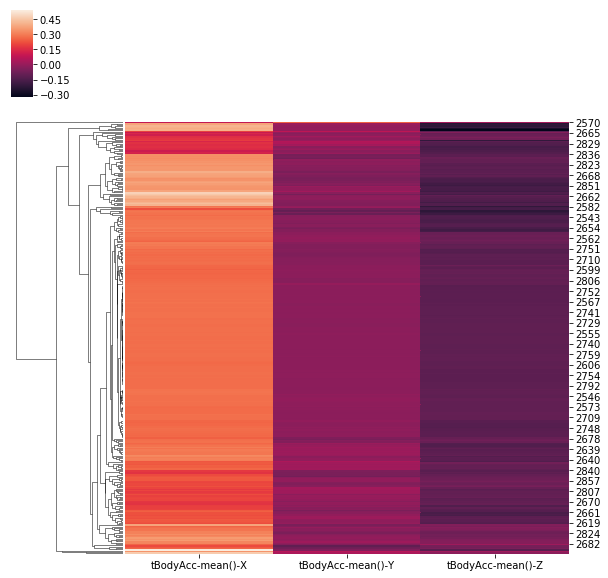

In [5]:
sns.clustermap(sub15.iloc[:,[0,1,2]], col_cluster=False)

In [6]:
data.shape

(7352, 563)

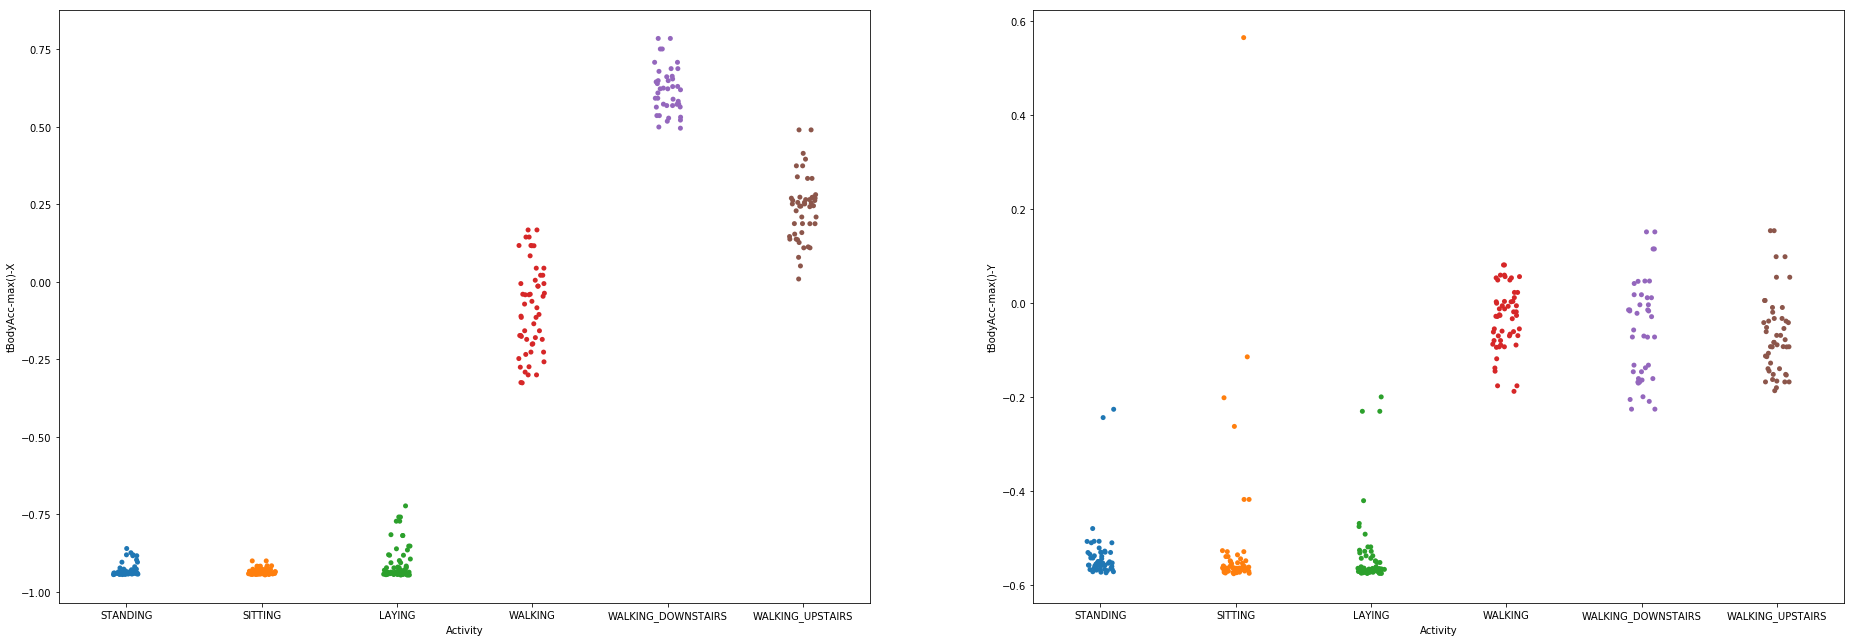

In [7]:
fig = plt.figure(figsize=(32,24))
ax1 = fig.add_subplot(221)
ax1 = sns.stripplot(x='Activity', y='tBodyAcc-max()-X', data=sub15, jitter=True)
ax2 = fig.add_subplot(222)
ax2 = sns.stripplot(x='Activity', y='tBodyAcc-max()-Y', data=sub15, jitter=True)
plt.show()

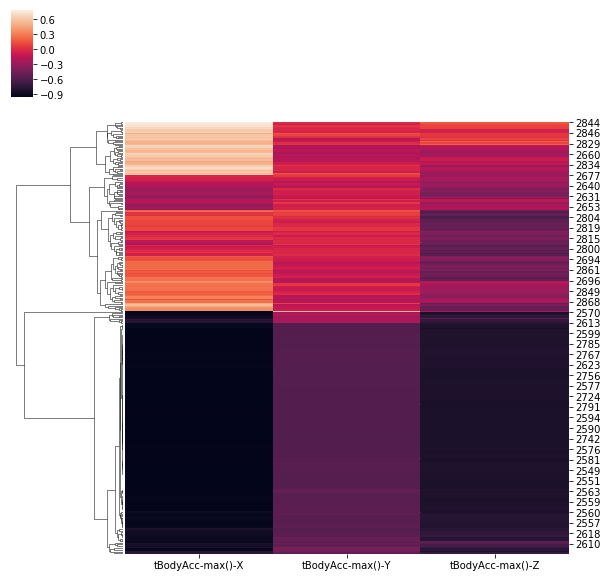

In [8]:
sns.clustermap(sub15[['tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z']], col_cluster=False)

In [9]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [10]:
data.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
tBodyAcc-std()-Z                        0
tBodyAcc-mad()-X                        0
tBodyAcc-mad()-Y                        0
tBodyAcc-mad()-Z                        0
tBodyAcc-max()-X                        0
tBodyAcc-max()-Y                        0
tBodyAcc-max()-Z                        0
tBodyAcc-min()-X                        0
tBodyAcc-min()-Y                        0
tBodyAcc-min()-Z                        0
tBodyAcc-sma()                          0
tBodyAcc-energy()-X                     0
tBodyAcc-energy()-Y                     0
tBodyAcc-energy()-Z                     0
tBodyAcc-iqr()-X                        0
tBodyAcc-iqr()-Y                        0
tBodyAcc-iqr()-Z                        0
tBodyAcc-entropy()-X                    0
tBodyAcc-entropy()-Y              

In [11]:
data=data.drop(['subject'],axis=1)

In [12]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


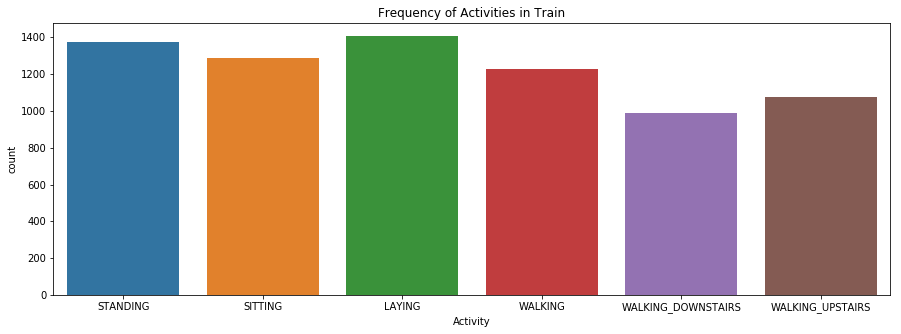

In [13]:
plt.figure(figsize = (15,5))
sns.countplot(data.Activity)
plt.xlabel('Activity')
plt.ylabel('count')
plt.title('Frequency of Activities in Train')
plt.show()

In [14]:
print(data.isnull().values.any())


False


In [15]:
print(data.Activity.value_counts())


LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64


In [16]:
X=data.iloc[:,:-1]

In [17]:
Y=data.iloc[:,-1]

In [18]:
#Applying the DecisionTreeClassifier Algorithm in the dataset.

In [19]:
l=[]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.1, random_state = 95)
clf_entropy = DecisionTreeClassifier(criterion="entropy",min_samples_split=.05)
clf_entropy.fit(X_train, y_train)
y_pred_en = clf_entropy.predict(X_test)
# print(y_pred_en)
#accuracy_score(y_test,y_pred_en)
l.append(accuracy_score(y_test,y_pred_en))

In [30]:
#printing the accuracy score
import math
print(l[0])

0.9266304347826086


In [33]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(y_test, y_pred_en)
print (results)

[[141   0   0   0   0   0]
 [  0 125  18   0   0   0]
 [  0   2 123   0   0   0]
 [  0   0   0  98   3   6]
 [  0   0   0   8  83   6]
 [  0   0   1   7   3 112]]


In [31]:
print (classification_report(y_test, y_pred_en))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       141
           SITTING       0.98      0.87      0.93       143
          STANDING       0.87      0.98      0.92       125
           WALKING       0.87      0.92      0.89       107
WALKING_DOWNSTAIRS       0.93      0.86      0.89        97
  WALKING_UPSTAIRS       0.90      0.91      0.91       123

         micro avg       0.93      0.93      0.93       736
         macro avg       0.93      0.92      0.92       736
      weighted avg       0.93      0.93      0.93       736



In [35]:
# import matplotlib.pyplot as plt
# from sklearn.tree import export_graphviz  
  
# # export the decision tree to a tree.dot file 
# # for visualizing the plot easily anywhere 
# plt.(X_test['tBodyAcc-mean()-X'],y_test)

In [36]:
#applying the RandomForestClassifier Algorithm in the dataset. 

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf=RandomForestClassifier(n_estimators=20,random_state=31,min_samples_split=.05)

In [44]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.05,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=31, verbose=0, warm_start=False)

In [45]:
y_pred=rf.predict(X_test)

In [46]:
print(accuracy_score(y_test,y_pred))

0.9442934782608695


In [38]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(y_test, y_pred)
print (results)

[[141   0   0   0   0   0]
 [  0 133  10   0   0   0]
 [  0  13 112   0   0   0]
 [  0   0   0 103   1   3]
 [  0   0   0   4  89   4]
 [  0   0   0   3   3 117]]


In [40]:
print (classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       141
           SITTING       0.91      0.93      0.92       143
          STANDING       0.92      0.90      0.91       125
           WALKING       0.94      0.96      0.95       107
WALKING_DOWNSTAIRS       0.96      0.92      0.94        97
  WALKING_UPSTAIRS       0.94      0.95      0.95       123

         micro avg       0.94      0.94      0.94       736
         macro avg       0.94      0.94      0.94       736
      weighted avg       0.94      0.94      0.94       736

